## Inciso A) Declaración de librerías, importar información y declarar núcleos de Spacy

In [1]:
# Importamos las librerías necesarias

# Librerías para el manejo de los datos
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim para la creación de modelos
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# SpaCy para el preprocesamiento de la información
import spacy

# Herramientas de plotteo
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Hacemos un Dataframe a partir del archivo de comentarios en -csv
df = pd.read_csv('D:\Documentos\Lenguaje natural\Reseñas_Comida_Modelado_Topicos.csv')

# Leemos el archivo .csv y asignamos sus valores en una base de datos
dfB = pd.DataFrame({'Texto Original': df['Text'],  'Texto': df['Texto']})
dfB.head(10)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \D
<>:2: DeprecationWarning: invalid escape sequence \D
<>:2: DeprecationWarning: invalid escape sequence \D
<ipython-input-2-e0eb5fe42309>:2: DeprecationWarning: invalid escape sequence \D
  df = pd.read_csv('D:\Documentos\Lenguaje natural\Reseñas_Comida_Modelado_Topicos.csv')


,Texto Original,Texto
0,I have bought several of the Vitality canned d...,He comprado varios de los productos de aliment...
1,Product arrived labeled as Jumbo Salted Peanut...,El producto llegó etiquetado como Jumbo Cacahu...
2,This is a confection that has been around a fe...,Este es un dulce que ha sido de alrededor de u...
3,If you are looking for the secret ingredient i...,Si usted está buscando el ingrediente secreto ...
4,Great taffy at a great price. There was a wide...,Gran Taffy a muy buen precio. Había una gran v...
5,I got a wild hair for taffy and ordered this f...,Tengo un pelo salvaje para la melcocha y orden...
6,This saltwater taffy had great flavors and was...,Esta agua salada Taffy tenía excelentes sabore...
7,This taffy is so good. It is very soft and che...,Esta melcocha es tan bueno. Es muy suave y dur...
8,Right now I'm mostly just sprouting this so my...,En este momento estoy en su mayoría sólo brota...
9,This is a very healthy dog food. Good for thei...,Este es un alimento muy saludable perro. Bueno...


## Inciso B) Filtrado de StopWords

In [3]:
# Importamos el núcleo de trabajo en Español de spacy
import nltk
pln_es = spacy.load('es_core_news_sm')

# Importamos la librería con StopWords de NLTK
stop_words = nltk.corpus.stopwords.words('spanish')

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Filtrar StopWords (Añadir más si lo consideras necesario)
StopWords = ['br', 'si']

Textos_filtrados = list()

for Utterance in dfB['Texto']:
    Texto = ''
    # Por cada token, si no es una StopWord lo anexamos al texto
    for Token in pln_es(Utterance.lower()):
        if((Token.text not in stop_words) and (Token.text not in StopWords) and Token.text.isalpha() == True):
            Texto = Texto + ' ' + Token.text
    # Agregamos a la lista el Texto ya 'destokenizado'
    if len(Texto.split()) > 1:
        print(Texto)
        Textos_filtrados.append(Texto)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 comprado varios productos alimentos perros enlatada vitalidad encontrado buena calidad miradas productos guiso carne procesada huele mejor labrador meticuloso aprecia producto mejor mayoría
 producto llegó etiquetado jumbo cacahuetes salados cacahuetes realmente pequeño tamaño sal seguro error vendedor pretende representar producto jumbo
 dulce sido alrededor pocos siglos gelatina luz pillowy cítricos frutos secos caso avellanas corta pequeños cuadrados luego generosamente recubiertos azúcar polvo pequeño bocado cielo demasiado duro sabrosa recomiendo deliciosa golosina familiarizado historia lewis león bruja armario tratamiento seduce edmund vender hermano hermanas bruja
 usted buscando ingrediente secreto robitussin creo encontrado además extracto raíz cerveza pedí bueno hizo soda cereza sabor medicinal
 gran taffy buen precio gran variedad deliciosa melcocha parto rápido amante melcocha trato
 pelo salvaje melcocha ordenó bolsa cinco libras melcocha agradable sabores sandía cerveza

 harina avena mccann cada mañana ordenar amazon capaz ahorrar casi caja gran producto sabe bien saludable
 harina avena mccann elección calidad buena favorito manzanas canela encontramos ninguno excesivamente azucarado buen desayuno caliente minutos excelente
 gusta avena cortada mccann encontramos preparan menudo sabe mejor marcas tienda comestibles tan conveniente mantiene comer harina avena cosa buena regularidad
 parece saludable marcas supermercado blanda sabor tan bien pasan prueba hijos así probablemente va comprar nuevo
 buena harina avena gusta manzana canela mejor aunque siga instrucciones paquete siempre aparece demasiado espesa gusto podría ser gusta avena espeso añadir leche parte superior
 sabores buenas embargo veo ninguna differce marca oaker avena ambos blanda
 gusta sabor arce azúcar moreno multa regular azúcar moreno añadió manzanas canela sabor bien desayuno rápida fácil satisfactorio voy ordenar marca nuevo variedad voy arce azúcar moreno
 mismo material puede comp

 mezcla pastor collie sii veterinario recomienda ingrediente alimentario limitado realmente ayudado síntomas gusta siempre voy comprarlo amazon barato envío libre
 perro seco natural balance alimentos harina cordero receta arroz hicieron maravillas jack russell alergia comida horrible alimento última esperanza última comida pudimos encontrar alérgico ningún problema comer seque normalmente mezclar balance natural seco cordero arroz integral equilibrio natural húmedo cordero arroz parece gusta mejor empezamos alimentar perro bichon encanta perro alergia edición estómago desea perro comer mejor lugar va ver diferencia mascota
 buena comida encanta idea alimento todas edades razas azt verdadera conveniencia así buen producto perros comer menos casi gas caca regular consistencia perfecta puede pedir madre
 caniche estándar pomerania ambos hacen maravilla alimento cambiado comida diferente debido precio par veces terminan volviendo derecho equilibrio natural
 gran comida perro perro alergia

 comprado adjudicar diferentes sabores pasa ser favoritos va obtener pronto
 encanta sabor ramen sabores sabor demasiado suave comparación conveniencia trajeran casa primera así conseguirlo dos días pagar gastos envío precio amazon mal todavía barato correr hacia abajo recoger caso supermercado
 mejor inversión hecho nunca jengibre increíble fibrosa jengibre real patada picante perfecto azúcar calma hacia abajo digno libras voy recibiendo pronto uso adorno bizcochos galletas jengibre
 delicioso puedo conseguir jengibre australiana vivo compara favorablemente jengibre australiano comprado ciudades ahora puedo disfrutar tener viajar
 sigo tratando marcas marcas baratas estúpido jengibre tan vale pena dinero tierna húmedo nunca decepción
 hijo reflujo ácido nacimiento medicamentos disponibles mejoría señor mayor entró lugar trabajo dijo acerca producto ordenó automáticamente realmente esperaba mejores resultados cosas intentado sorpresa ninguna acidez síntomas día comer partir pieza jengi

 gran cosa hecho pan plátano sabroso buena calidad precio bajo ciudad
 problemas encontrar local parto rápido caza pasillo harina tiendas comestibles locales
 paquete esmalte secreto hacer tartas fruta fresca europeas estilo punto hacer tarta subasta iglesia después amigo pidió fresa debe ofrecer usted puede hacer tartas fruta sorprendentes relativamente sanos cocción base capas crudo fresco frutas rodajas continuación verter contenido confeccionados paquetes endurecen temperatura ambiente fruto conjunto pueda cortar tarta dejan belleza espectáculo través frutos dispuestos visto esmalte utiliza pasteles queso sostener fruta relleno lugar personal gusta pastel queso demasiado rica pastel queso cristal frutas precioso admitir ello segmento fruto colocarlo capa tarta queso mientras todavía molde desmontable verter esmalte dejar reposar luego retire aro resorte vas tener capa clara fruta parte superior tarta queso cerezas fresas mangos rodajas agradables mejor jamás utilizado lonchas finas

 probado variedad té ahmad gusta especialmente marca fáciles encontrar mezcla imperial creo complejo bien equilibrada probado cuerpo completo buena taza assam ninguna manera dominar delicioso sabor limpio darjeerling nota larga duración bergamota gusta mejor noche da final satisfactorio relajante día trabajo aquellos interesados detalles cerca cucharaditas té perder infusor acero inoxidable taza oz dejar reposar agua minutos tomar grupo infusión beber azúcar leche saborear sofisticación
 intentado docenas tés introdujo costumbre rusa preparar beber té mezcla ahmad imperial probablemente favorito debido hecho igualmente delicioso caliente helado compro tres paquetes necesarias amazon vaya través rápidamente familia encanta amigos casas ahora tratar caja encanta
 excelente té mejores especialmente grande prepara samovar
 aditivos base hierbas mezcla destruyen sabor té real sólo personas gusta sabor hierbas
 hace comida sabrosa fácil rápido altos calorías instrucciones dicen saltear verdu

 cinco minutos tentáculo mordido dentro bola quebrada mitad suficientemente resistente ser perro juguete decepcionado así perro
 sensible química así azúcar usando producto año utilizo quizás vez semana máximo tomo botella luego aumentar energía después dos horas dependiendo cómo siento omi sustituye café mañana dulce tarde comienzo desvanecerse vez tomo botella llena entrenamiento bebiendo té mate yerba guayakí años comparación impulsores energía tóxicos ahí recomiendo producto limpia deja detrás chems desagradables cuerpo probarlo juzgar partir revisión cuerpo cada persona reacciona manera diferente
 sentía lleno energía dentro cinco minutos duró minutos pagué bebida podría haber bebido taza café guardado dinero
 probablemente saludable energy starbucks usted mirando evitar sobrecarga cafeína todavía mayoría bebidas energéticas pueden hacer w alta dosis cafeína creo contenido cafeína guayakí tiro ml probablemente menor bebidas disparo energía saludable creo mayoría personas evitar ma

 pagué paquete oz almuerzo hoy compré arroz integral buen carbohidratos tan pronto probé sabía chip maíz comprobé ingredientes nombre engañoso masa harina maíz aparece ingredientes abruma sabor voy comprar nuevo puedo conseguir sunchips menos dinero sabor similar
 uso rotel leve amo producto ahorra base diaria usted tratando cocinar menos grasa alimentos sanos prisa hace fácil alguna vez aviso tomates enlatados lata raro sabor hace salsa spagehetti alguna razón producto sabe tan bien sólo puede volcar lata frijoles calor comer añadir chile polvo ahora usted sopa chile hago platos indios salsa espaguetis picante prefiero mayoría salsas conserva funciona cosas quesadillas drena líquido ninguna tiendas comestibles locales llevan absoluto tampoco llevan igual así pagar precio inflado amazon pedir caso gusta pagando precio alto encanta producto
 precio producto duda plantea atención compairing precio amazon tiendas locales puedo conseguir lata rotel kroger local decepcionante
 howdy ustedes

 encanta comodidad sencillos mejor crema igual botella grande puedo pegarlas bolso llevarlos trabajo
 cremas vienen paquetes tomado trabajo abrió hogar momento encontrado solo rota fugas crema todavía general demasiada crema azúcar café fácil reducir dulzor voy permitir cremas taza creo éste duda mejor opción cremas compra amazon listados montón quejas cremas rompen envío
 pesar fanáticos delight internacional totalmente decepcionados producto ningún problema envío crema delgada delight internacional aparte felices d
 además comodidad obvia portabilidad cremas individuales gustado artículo específicamente debido envases podía creer cantidad comentarios leí tazas crema café muchas opciones crema amazon coffeemate deleite internacional múltiples críticas negativas debido cargamento llega tazas rotas gracias envases descuidado problema aquí envío llegó cuatro cajas dispensación cada muestra foto cajas estrechamente embalados caja cartón espesor podría tomar buena paliza dañar cajas intern

 sólo sopa fideos pollo fantástico mejor comido grandes trozos pollo abundante verduras fideos grandes agradables sopa tan cuerpo sazonada justo contenta amazon lleva producto puedo encontrar aquí vermont
 utilizado aceite varios años mejor comer pan cocinar encanta regular uso arrepentirá haberlo cansado ideal mojar pan cocinar tortilla judías verdes
 oh dios tan bueno mayoría gente comiendo salsa tomate toda vida nunca pensé respecto entonces marido trajo frasco casa sabor tomate increíble nunca voy comprar tienda salsa tomate cada vez
 sir kensington hicieron gran trabajo actualización salsa tomate clásico maravilloso producto sabor salsa tomate renovado gran actualización ahora deja decepcionado dan heinz mientras hacia restaurante heinz mueren ventiladores duros ahí salsa tomate aquellos ustedes desea siempre sabía podría ser salsa tomate regusto químico encuentra heinz asegúrese darle salsa tomate intentarlo olvide variedad especias compra paquete variedad clásica especias primer

 cuál decir galleta chocolate fantástica único podría mejorar ofrecían caja bushel presentaría cabo tan rápido esperamos van camino dinosaurios
 llegaron tiempo empaquetados envoltura plástico verde galletas tan frescos cuadros encontrados supermercado local ninguna queja ahora galletas comimos
 esperando recibir cookies galletas chocolate bastante bien realmente prefiero galleta suave nítidas decir galletas amos famosos pertty dio vuelta cookies ricos profundidad sabor proviene ingredientes calidad chips reales chocolate derriten boca redilly crear experiencia húmeda mientras masticación verdaderamente grandes cookies
 engordan buenos usted verdad oído menos persona reconocida fiable
 grande usted cortando cantidad grasa parecen chips regulares extremadamente seco duro
 nunca conocido chip marca caldera gustó chips gran sabor patata cargado sabrosas gusta cebolla dulce fichas mejores encuentran parte superior lista gran sabor papas fritas patatas kettle unas patatas fritas f dinero
 d

 sabores caldera chips pueden ser impredecible sabores terribles sencillo delicioso probablemente mejores sabores pros grueso papas fritas crujientes sal luz compromete sabor ecológico negocio sólo da boquilla contras chip quemado ocasional bolsa dolor abrir pestaña puede tirar hacia abajo mayoría veces terminan destruyendo lado bolsa use tijeras lugar
 compramos chips pequeña tienda sándwiches sonoma mientras vacaciones seguro esperar paquete primer bocado sabía pensar luego sabores golpeado yum picante insoportable montón tan sólo crujiente dulce picante bondad venden todas partes embargo todavía tratando encontrar lugar cerca vivo
 admitir chips tan buenos altamente adictivos puedo dejar comerlos crujiente sazonado cantidad justa sabor sal simplemente perfecto créeme chips tan salada puedo terminar pequeña bolsa éste sólo seguir comiendo
 mejores patatas fritas seguro latido cualquier cosa ahí aún cocinado manera mejor usted mayoría marcas picante crujiente satisfacer cualquier anto

 quizás peores chips nunca entrado boca toda crema cebolla caso cebolleta patatas fritas favorito amarga vida recientemente marca hervidor miel mostaza dijon tomó ranura así descubrí crema agria cebolla sólo probarlos cuanto abrí bolsa chips olían leche polvo hecho cada chip cubierta crema agria polvo horrible sabor leche rancia sólo agrio igual crema agria rancio textura polvo atractivo básicamente odiaba chips recomendaría chips nadie menos afinidad particular polvo textura terrosa chip rancio cebolla sabor dificultades creer persona existe plan ponerse contacto caldera compartir pensamientos esperemos vuelva evaluar guarnición maravillosas contrario chips tipo cocidas
 patatas kettle ahora apariencia sensación sabor lays chips solía ser favorito corte arruga fuerte ahora favorito
 gran precio excelente chip centavos bolsa oz ganga así chip sabroso dejado tratan éstas impresionado comentó bien saben todavía encontrar chip hervidor decepcionado
 encanta chips comprado abastecerse año 

 chips tan picante esperaba esperado poore hermanos mejor opción aficionados núcleo duro sal n vinagre
 bolsas montón piezas cocidas marrones sentía grasienta seguir limpiando dedos servilleta
 primera vez probé pensé wow rápidamente encontré demasiado picante maldito tarta difícil disfrutar boca sitio
 conseguido chips hervidor sal mar vinagre oz bolsas impresionó probado tipo piso comiendo bolsa miré hacia abajo bolsa vi agujero bolsa tamaño semilla sésamo entonces empecé buscar todas bolsas abrir tipo mismo agujero bolsas múltiples agujeros bolsa agujero tamaño moneda diez centavos parte inferior bolsa roedor llegado misma caja envían agujeros llenas manera cuanto control calidad nunca deje buques debería ser despedido huelga decir nunca voy comiendo productos hervidor agua esperar reembolso completo caldera amazon martín
 enfría nevera parece aumentar sabor aún uso lugar chips maíz hacer nachos paladar cantando janet jackson ninguno riesgos asociados armario recomendable
 originalm

 chips grasienta sabor quemado grasa parte inferior bolsa chips saturados parte inferior bolsa incluso libres grasas trans ser menos graso
 pierda dinero cualquiera papas fritas kettle marca comprado caso caso queso cheddar crema agria ambos casos parar basura
 definitivamente tan sabrosa manicomio munchies favorito familia calentador agua color oscuro quemado bits rotos sabor grasiento graso contracción luz oh bien
 encanta comida agria éste puedo soportar demasiado fuerte sabor amargo incluso abre bolsa olor agrio demasiado fuerte gusta
 menos realmente realmente realmente vinagre evitar chips deberían haber sido llamado vinagre sal mar sal marina vinagre
 gustado caldera marca sal mar vinagre virutas primera vez probé hecho capaz encontrar línea precio tan grande maravillosa definitivamente gustaría hacer compra nuevo bocadillo rápido sencillo almuerzo va bien sándwich frío
 utilizada comer picante sabor tailandesa tiempo msg hace cuerpo infeliz pocas fichas sabor libre msg ahora ca

 verdadera buena aman chips mismo ocurre clientes pueden ir mal ingenio éstos mejor
 encanta chips ahora toda familia engancha únicas patatas fritas comemos
 sé decir demás cubierto gustan patatas fritas guste obtener em venta puede limitar consumo puedes
 usted buscando probablemente sabe igual chips trata gran cantidad ningún problema va rancio bolsas oz gran tamaño merienda ayudar evitar comer exceso
 aunque admito chip saladísimos adictivo realmente pienso éste ido demasiado lejos piel literalmente quitó labios interior boca después comer sorprendido todavía mercado
 sólo mg sodio porción patatas fritas crujientes veces voy sumergir salsa tomate baja sal añade sabor
 encontrado producto hervidor patatas fritas sal ser fabuloso encontré accidente amazon después caza tiendas locales frescas sabrosas totalidad sal
 vi fichas picantes tailandia sabía probar encanta picante encanta comida tailandesa primer lugar chips súper picante realidad sabor especie dulce primer momento grados sabo

 patatas kettle gruesas crujiente aunque grasiento veces fichas sabor dijon miel sabe delicioso sabor salado abrumadora chips baratos tamaño oz ideal tomar aperitivo tamaño adulto
 siempre gustado sal vinagre patatas fritas mayoría veces sabor fuerte fondo bolsa vinagre desborda primer chip detiene terminado bolsa adictivos gusta sal vinagre chips finales compara
 buena probado picante aquellos gusta picante debe mantenerse alejado precio pagado buena compra
 verdaderamente deliciosa especialmente gusta papas fritas civil única preocupación grasa entendido chips hervidor agua frito pequeños lotes abrir bolsa cosa fuerte bolsa tijeras necesita capa aceite interior bolsa propias fichas sugiero mancha sacudida toallas papel consumir cualquier manera sabor delicioso patata satisfactorio crujido delicioso
 bolsas difíciles abrir ayuda alguna herramienta tales tijeras siquiera intentan tijeras crujientes sabor chips anuncian salada definitivamente saludables puedo sentir grasa dedos comer pu

 puede sonar ridículo realidad ordenó marca equivocada papas fritas pedí chips jalapeños momento hice pedido podía recordar nombre chips jalapeños recientemente descubierto gustó chips caldera marca empaquetados bolsa color similar embargo salió mejor gusta chips jalapeños felizmente picar lejos transcurso próximos juegos fútbol tv quedo probablemente algún momento próximo año voy comprar likey señorita vicky marca chips jalapeños intención probar sabores chips humilde opinión chips caldera marca excelente recomiendo patatas fritas sinceramente homiedog
 señorita vickies mejores desafortunadamente menos ampliamente disponibles seguro dura palabra correcta diferencia notable dos marcas miss vickie mejores humilde opinión
 quiero igual caldera contienen aceite maíz aceite soja vez ogm hijos alérgicos maíz soja darnit cosas muerden lado positivo nitidez puede impiden disfrutar pensar demasiado lado negativo boca llena cortes arañazos vale pena ser tan duro crujiente malo simplemente luz c

 solía edulcorantes wholesome agave igual mejor cambió hizo demasiado caro así opción baratos sabor mismo parece menos dulce parece usar conseguir dulzor justo café gusta contenedor vierta bien así vierte mejor botella flexible modo masa pegajosa contador días bien precio continúo envíen cada dos meses
 encanta usar endulzar té café sabor mejor edulcorantes bajo índice glicémico ningún regusto amargo
 pedí producto dos veces contento entrega producto funciona bien cocinar hornear sustituto azúcar café leche chai
 gusta producto sabor bien café té peso perdido cortando azúcar reemplazarla miel néctar agave
 utilizando días dieta guiada bajo índice glicémico comer meses bastante éxito ámbar néctar agave convertido principal edulcorante debido bajo índice glucémico glucemia sabor suave poder edulcorante azúcar alto utilizar menos acento miel única cosa probado sigue utilizando azúcar haciendo kombucha sigo uso azúcar seguro buena idea introducir elemento crudo kombucha realidad sólo puede

 marido ser mexicana exigente chips tortilla encanta absolutamente textura ligera crujiente espeso crujiente realidad general prefiere abundante chip cruncy igual ranchero sabor tan fantástico dos thilled base frijoles arroz maíz hace increíblemente sabrosa toque cebolla ajo además vamos través cantidad embarazosa nunca nunca chips fricción puedo comer aunque particularmente impresionante salsa fresca recomiendo
 gp product plocky chips tortilla frijoles rojos n rice onza bolsa pack probé primera vez fichas mientras visitaba parientes kentucky disponibles lugar vivo así pedí amazon guauu amigos familia adictos sabor picante atrapa primer bocado vez bolsa abierta ido
 chips salsa quacomole mejor cualquier pic mercado incluso grandes mismos vamos pedir siempre disponibles gracias hacer accesible shelly kenyon
 creo sabe va hacer cosquillas paladar gran fan tabasco amo aperitivos convencionales sabor incluso remotamente parecido salsa maravillosa hechos pareció patada absoluto prácticamen

 trabajo universidad ayuda financiera mantener plato escritorio estudiantes solía comprar tienda comestibles luego supe podía conseguir menos línea bolsa libras idea trato bueno encontré gran oferta
 bien vale pena dinero hice cálculos diferentes bolsas cantidad dólares valor excelente aproximadamente cop caja ahora pasado mitad caja encontrado envolturas bastante bueno cuenta necesita libras ir producto disfrutar
 bastante buena carne conserva salchicha usado arroz sucio hamburguesa usado ensalada taco pollo arroz salvaje cerdo relleno pavo dado vecino distintos tipos carnes bastante buena calidad suficiente grandes porciones cada lata grandes trozos grasa cartílago cualquiera latas experimentado montón marcas carnes enlatadas proporción líquidos carne justo aquellos cucharada carne resto líquido bien pesar hace necesidad ser cocinado contrae debido alto contenido grasa carne ninguno carne sazonada absoluto útil carne puede utilizar cualquier saborizante leve correo deseado textura sa

 mejores opciones opinión adoro amazon necesitan negociar mejor precio discos tassimo disponibles bedbath allá siempre dan descuento lleva hacia abajo cupones fácilmente disponibles hace meses vez excelente mezcla sabor amarga creo favorito
 tratado alrededor disponible mezcla kona mejores cafés regulares sabor tassimo agradable sabor suave dominando aroma agradable personal gusta fuerte audaz embargo ser suave va bien desayuno productos horneados gluten resulta ligeramente desconcertante producto disponible tassimodirect servicio suscripción disponibles originalmente encuentra presente murciélagos muertos allá utilizan cupón contento precio final
 café bueno especial voy comprar vez bonito suave mezcla café diario favorito nabab ahora debe ser enviado canadá embargo primer fin empresa canadiense tomando tiempo ser entregado todavía conseguido razón tan sólo tres estrellas trata calidad café hecho descripción producto menciona hecho café kona realidad sólo kona mira cuidado foto disco 

 té mejor té nunca probé primera vez noruega encontrarlo cada mañana
 encanta aroma sabor fruta vainilla combinado adición ginseng impulso energía añadido rondas té cabo bien té dulce hace alternativa saludable maravilloso desierto después cena veo gusta realmente cuestión gusto personal diferentes cursos diferentes caballos
 mejor chocolate mundo humilde opinión crítico hace unidos mejor chocolate unidos hace california empresa chocolate ghirardelli duda mejor chocolate puede encontrar muchas tiendas centros comerciales través unidos tiendas reales raras kroger martin anteriormente ukrops larga lista tiendas comestibles centros comerciales almacenan productos nunca encontrado chocolates leche relleno caramelo superar calidad chocolates merecen poesía pueden comer rápidamente tomar tiempo saborear cada momento comer cada elección depende usted
 trata marca calidad buena sabores chocolate cuales éste sólo sabroso entrega rápida
 madre padre destinatario maravillosas piezas paraíso choco

 siempre sorprende comentarios aquí exaltan buenas cualidades té docenas bebido prácticamente días últimos cinco años canso excelente té mañana suave ser insípida casi imposible ruina oversteeping sólo utilizar agua decente gusta stevia pelele pone manifiesto dulzura natural estilo malta ligeramente floral acabo comprar dos libras
 casi nunca escribo críticas té excelente decidí probarlo ningún tipo edulcorante cualquier potenciadores sabor añadido sabrosa ser abrumador gran placer tener té bien así suelta precio razonable después primer intento seguido beberlo solo viene puede ver hojas vez empapan té alta calidad
 leído críticas comprar complace hice comprado tés numi dio generalmente sido feliz theri productos
 opinión caramelo bien debe ser cremosa fusión granuladas sabor éstos bien aunque dulce gusto
 después haber comido volver comer camino través toda gama das caramelo sigue siendo favorito tiempos normalmente recibe críticas favorables comparto cosa fácil hacer acaba probar ver

 hijo múltiples alergias alimentos realmente disfruta barras parece buen sabor baya masticabilidad agradable
 amo demasiado dulce justo cualquier alimento libre alergia grande libro esperanza contiene ingredientes maíz embargo aprecian hecho abrió nueva caja corte apagado tamaño menos así gastos decisión efecto comprar vez niño necesito bar tamaño real favor
 extremadamente disappionted abrí envío disfrutar vida ir bares berry carmel apple cacao loco cajas ahora know design you genérico llano clase todas marcas cambian quieren hacer productos vean barato continuación comparé ingredientes nuevo envío cajas mayor edad todavía casa adivina ingredientes baratos continuación gusto prueba ayuda años quería comer nuevos puede culpar aceitosa sosa pareció disfrutar vida marca realmente preocupaba uso ingredientes calidad hacer producto buen sabor equivocado resumen demasiado caros ser hecho baja calidad ingredientes sabor desagradable
 consulte imagen publicado anteriormente barra mitad tamaño

 trillizos comer eventhe va comer cualquier cosa consistencia demasiado nasal así queda cuchara
 bebé encanta batatas esencialmente puedo mezclar cualquier alimento patatas dulces comeré caso podría ser buena mala cosa dependiendo quería mezclar allí horrible moquea spooning fórmula boca ick
 hija gran fan comida bebé especialmente cualquiera proteínas hizo amor éste sabor justo demasiado dulce demasiado salados fuerte sabor pollo casi patatas dulces civil tan fuerte buena primera proteína oferta buena caprichosos sobrinos sobrina gusta sabor así apuesta bastante segura mantener mano usted sabe preferencias bebé particular gustaría haber sabido absolutamente runnier mejor etapa tierra tener pollo añadido cereal arroz espesar después hija cansado textura líquida gustó bien paso adicional embargo textura runnier hace viable bebés pequeños aquellos problemas náuseas textura
 único alimento hija va comer consistly realmente disfruta embalaje grande nunca ninguna roto haber ordenado veces
 

 gran té degustación buscando buen té sasafrás voy ordenar producto vez gracias kim d
 importaba producto absoluto pensé mismo té hermanas utilizo beber escuela primaria descubrí té utilizamos beber realidad procedían raíz tipo particular árbol
 comprado leí cura natural hives um hizo colmenas sabor horrible suerte compañero trabajo gusta recuerda abuela dio asqueroso asqueroso cosas
 buenas semillas girasol precio bueno prefiere variedad sal puede ser difícil encontrar cosa tener cuenta embargo vencimiento mejor ejemplo usted pedir abril lote recibe uso junio puede ser tramo consumir bolsas semillas empiezan ir rancio usted asados aceite sal semillas pueden echar perder facilidad variedad salado incluso refrigerado recepción amazon parece especificar usar comida productos venden riesgo comprador asumiendo amazon enviará material caducado probable envío hacia acción antigua primero consumo artículo puede ser seleccionaría elección
 encanta panang curry preferiría evitar arroz blanco ma

 esperanza caramelos verdaderos trufas caramelo sabor siguen siendo deliciosa duda ordenar nuevamente tal vez regalos sal sólo hace extraordinariamente sorprendente bummer envío envío tema razonable compró chocolate pretzels cubiertos mismo tiempo envío acusado ambos conceptos aunque llegaron misma caja siquiera especial embalaje edición bien realidad molestan estómago después trufa paquete entrega lista ingredientes ir sitio compañía directamente encontrar página ingredientes bien escondido difícil seguir descubrir gran cantidad ingredientes sombra incluyendo jarabe maíz alta fructosa caja espero jarabe maíz asimismo esperaba propilenglicol anticongelante vainilla espero granos vainilla vainillina artificial veces proviene glándulas anales castores decepcionado calidad ingredientes revisión va estrellas gustaría hacer estrella extra delicioso
 deseando cecina ciervo tiempo así dio éste amazon intentarlo sinue demasiado dulce gusto va comprar nuevo im todavía búsqueda versión seca sala

 afirman producto adulterar haría pensar oh dulce va ser mejor aceite coco nadie dice adulterar visité página web aquellos ustedes don sé desee ir aceites prensados frío prensado frío significa sido procesados maquinaria importante sometidos alta presión temperatura vale puede suele matanza minerales vitaminas buenas puestos sitio información proceso extracción día hoy dice manila método extracción aceite coco través propietario expulsor mecánico manila virginflo contener humedad baja posible rancidez evitar mantener vida útil consistente años condiciones normales aceites etapa primera segunda solventes químicos blanqueado desodorizar hidrogenación enzimas fermentación kee p luz aroma dulce coco natural sabor método mantiene carácter único incluso somete alta grados celsius temperaturas calor mecánica expeller forma extracción dicen sustenta única bla bla bla carácter somete altas temperaturas calor opinión personal adulterada información productos amazon hacerlos sonar dirección clara

 usted encontrará mejor té verde flojo precio capaz obtener libre navegación así compré cosa ascendió té utilizado japoneses caiga tés alto precio orgánicos verdes producidos empresas estadounidenses buenos recibiendo mejor hime ban cha tea
 té verde favorito casa usando años feliz encontrar aquí amazon contrario viajar cuarenta millas tienda comestibles oriental comprarlo puede incluso comprar tipo té hojas cualquier tipo tiendas comestibles forma regular cierto ban cha japón simplemente significa té común cotidiana ceremonial
 encanta té tan sabrosa embargo hierba cortada mal sabor igual tipos té verde tan suave incluso dejó empapar convierta sabor suave hijos disfrutar grande edulcorantes té hojas sueltas llena hojas despliegan largo esbelto té va largo camino disfrutar
 bebiendo té verde algún tiempo comprando iba siracusa cada verano año dejó ir allí sabía iba comprar té vi amazon compró satisfecho podía conseguirlo ahora campista feliz vez
 verdadero negocio genmai cha perder té 

 acaso alguien sabe té blanco diferencia color verde negro citemos wikipedia té blanco secado rápido mientras té verde tuesta horno sartén mientras mantiene movimiento incluso curado oolong té negro fermentan curar significa traduce bebida favorita empezar día evitar va través día términos objetiva científica té blanco dice antioxidantes menos cafeína opinión general mejor café variedades color negro verde producto particular mientras viene bolsitas té exactamente variedad supermercado diferencia tés baratas negro verde hierbas blanco entregan aplastados dentro bolsas papel marca elección entrega forma pirámide biodegradables bolsas aseguran obtiene hojas reales indistinta polvo triturado té blanco delicada sutil adjetivos necesarios uso pueden aplicarse caso encontrado flores agregado ser demasiado fuerte bordeando dominar gusto aromas lichi osmanthus puede ser gusto adquirido pensar manzanas verdes dulces aroma familiar equivalente amor primer sorbo dar tiempo sólo puede tolerar pref

 decepcionado compra fechas secaron sabía dónde cuero vez fechas debe haber sido sentado allí largo tiempo
 pedí tres bandejas siendo tuerca fecha encontró dos edad rancio admito marcar fecha paquete exterior todavía secado fruta última bandeja fresco experiencia agrió punto decepcionado
 compra producto parece ser casi literalmente tirar dados juego dados experiencia parece ser similar experiencia peter desgracia precio excelente pedí después fecha robert bois positiva experiencia opinión escrita fecha experiencia positiva opinión escrita cindy compré éstos di padre ama fechas di cuenta visitando cesta fruta seca cuelga alrededor nevera tiempo cualquier cesta fecha jamás pedido último pregunté acerca dijo quería ser grosero conmigo herir sentimientos fechas así preguntaba debería probar comer semillas centro ver suaves fechas duras roca rancio probado mortificado decir menos entonces quería saber broma hecho vuelve loco compraron castigo reír preguntó personalmente probado voy tomar p

 mezcla muffins horrible gusto harina crema agria utiliza hacer sólo sabe extraño tratado tratado buenos carbohidratos degustación trata bajas esp diabéticos
 encanta salsa probado mercado serví dippin fiesta reciente domingo fútbol reúnen buenas críticas tal vez mejor salsa probado servido quieres probar mejor prueba
 pasé primeros cinco años vida brasil padres estadounidenses hablaba portugués fluidez presentó alimentación cultura brasileña comidas favoritas nunca recuerdo persistente brasil esponjoso húmedo hecha harina tapioca pequeños rollos queso americano serio difícil describir sabor caliente horno tan fabuloso frío yoki mejor fabricante mezcla seca acaba añadir huevos aceite pop horno deliciosa golosina fácil guarnición nunca salen mal
 hice recientemente fiesta nunca visto ir tan rápido fácil sólo añadir ingredientes mezclar echan horno definitivamente voy comprando haciendo éstos vez
 tan buenos houston samba grill buenísimo textura diferente lugar tener éstos base diaria en

 té tuna suelta hace gran té helado difícil encontrar forma pura té té negro espinoso sabor pera costo envío doble costo té componente tuna casi indetectable beba sólo sabe té negro regular decepcionante
 moscada montaña jarabe arce verdadero negocio grado b maravilloso crepes casi cualquier cosa gustaría endulzadas entrega oportuna producto llegó esperaba recomiendo
 acabo recibir envío apenas podía esperar probar producto encanta quot quot inútiles llamamos lugar etiquetas pueden quitar fácilmente hija diseñada signos imprimirán inverso utilizar ventanas coche impresa maravillosamente programa the print shop voy tener montón diversión producto ventanas todas partes superficies pantallas televisión monitores ordenador
 buena idea producto final excepcional uso pegatinas ventana coche mundo pregunta dónde comprado calcomanías hice dos pulgares arriba
 después años beber red bull rockstar monster encontrado santo grial bebidas energéticas inicia plazo minutos dura día trabajo después si

 perros aman convite hija mayor varón joven iba sentarse levantarse ir hacia abajo darse vuelta hacer trucos repertorio di comando cada vez sacó bolsa galletas hígado mujer encanta menos tonto además nunca molestado estómagos reacciones alérgicas causadas finalmente encontrar lugar vende mayor decir lbs bolsas iba tienda tiempo comprar meto kongs combinación croqueta regulares calabaza congelarlo recomiendo altamente tratamiento
 cinco cinco perros acuerdo galletas hígado lugar masque cualquier cosa saco convite vienen corriendo alegra em up anima obedecer permite saben aman puntos formación duros cachorro libras pocos casos produciendo lenta golosina cavado arrinconaron mismos bolsillo creo éxito
 perro encanta golosinas espolvoreamos comida seca perros regulares traga rápido pueda utilizamos recompensa buen comportamiento maravilloso nutritiva bueno tener mano momento
 lucy ama delicias igual amigo margarita sé decir llenar palabra mínimo
 perro va hacer golosinas compra bolsa cinco 

 comentario muchas opiniones producto realidad diferente cacao crudo criolla polvo viva consciente ecuatoriana prima cacao pedí hace aproximadamente meses increíble casi reordenar cuenta amazon dirigieron producto saquin pedí mismo precio base envío libre dólares aumento precio grande sé todavía vivo consciente mediados febrero recientemente cambiado confundido irritaba opinión cacao crudo viva consciente consiguió cambiar marca diferente vendedor diferente quiero decir pueden simplemente decir disponible disponible hacen cosas iban cambiar opiniones torno parece limpios transferir opiniones producto diferente nuevo críticos declararon comparables saquin terrible comparación obtendríamos vivos conscientes aumento precio bastante chocante supongo mercado cacao crudo mayor demanda lástima precio tan impresionante cacao realmente impresionante hace hice pedido vivos conscientes fragmentos cacao criollo bruto recomiendo altamente descripción viva consciente marca francamente empezando preg

 gusta té jazmín gran té lite excesivamente medicina sabor té jazmín puede ser divertido ver hojas té despliegan empinada tantas veces perdió cuenta jaja simplemente genial
 recibido caja éstos trabajo paquete momentos ido tras abrirlo grandes galletas ahora pidiendo par cajas regalos gente puede averiguar conseguir
 envié producto cuñado así nunca visto producto saben respecto oí impresionado aparte puedo decir entregado pedí dos va diferentes direcciones dieron información inmediata primera hablamos cuñado idea producto aún sido enviado gustaría pedir vez probablemente gracias modos curt t
 sabores tic tac favoritos gran sabor cereza silvestre amarlos lástima fácilmente disponibles compra nivel local
 pequeños bichos difíciles encontrar así feliz conseguir paquete grande precio bueno línea hija contenta recompensa hacer bien calorías pieza saludable
 duda volvería cambiar orden éstas nuevo creo mejor ofrecen paquete grande hijos encanta regalos día san valentín gran pequeña embutidor

 stevia menos edulcorante natural calorías mayoría veces stevia polvo tan amargo nustevia nustevia absolutamente ninguna amargura sabe exactamente azúcar verdad asombroso añadirlo yogur natural increíble postre libre culpa desayuno plato merienda añádelo tomar té café recetas cualquier cosa producto verdaderamente mágico barato recipiente oz amazon cualquier venden gnc oz además bebidas recomiendo líquido stevia extremadamente potente veces versión polvo toma tiempo disolverse bebidas heladas finalmente disuelve embargo
 después años uso edulcorantes sintéticos equal sweet n low di cuenta efectos largo plazo quería encontrar alternativa buena nustevia descubrimiento afortunado prácticamente aftertase amargo natural utilizando exclusivamente año funciona bebidas calientes frías viene granel paquetes utilizado hornear probablemente hará química mayoría recetas depende azúcar similar conseguir buen efecto embargo uso diario bebidas producto bueno
 bastante escéptico stevia primer momento 

 olvide starbucks peets cualquier cosa verdadero negocio buen vino vendimia café britt verdaderamente gourmet sabor después exigente café general evito después viaje costa rica enamoré bebida vez usted utilizar prensa francesa obtener favor completo tirar artilugios hacer café granos merecen mejor paladar merecen mejor trabajo britt pagan decir ustedes britt leer envíame muestra dos
 café suave café oscuro asado probado nunca placer disfrutar café cuerpo desayuno después cena
 encanta café críticos hice viaje costa rica adicto inmediatamente café negrita sabrosa amante cubierta probado muchas marcas diferentes sólo encontrar britt lejos mejor traje bolsa costa rica empezado ordenar suministro puedo volver cafés comprados tienda sosos definitivamente vale pena intentarlo usted decepcionado
 café delicioso cuerpo deja gran sabor casi chocolaty después padre contó después viaje costa rica
 marido vacaciones costa rica maravilla tiempo allí bebió britt tueste oscuro amado sabor ningún sabo

 seco sigue siendo buena pueden ser perfectamente bien sólo pensé fideos duras secas todavía disfrutando
 sabor bueno menos bueno japoneses chinos sabor básicamente especie gusto americano japonés además precio competitivo sugeriría asiáticos comprarlo
 pedí muestreador decir realmente gusta sabor vainas tienda donuts clásicos suaves homogéneas prácticamente amargura puedo creer fresca logran mantener vainas doy cuatro estrellas prefiero recién tostado molido fecha apuro mañanas mayoría mañanas echo mano manada tienda donuts clásicos
 mezcla especias puede volver crear sabor guisos restaurante favorito potente así use demasiado huele celestial perfecto guisos carne frijoles
 gusta ajo haciendo baño yogur griego mayonesa baja grasa suelo añadir espinacas picadas misma servir verduras crudas patatas fritas conseguido excelentes críticas amigos única queja compone legumbres secas polvo difícil asegurarse distribuidos igual mide cabo
 comiendo alimentos adecuados mcdougall años éste mejor 

 pregunta seguida respuesta buen servicio cliente hola chicos así tratando alimentar recién nacido tanta leche materna podamos embargo suficiente satisfacer necesidades nutricionales así fórmula fin suplemento interesados fórmula niño parece cumple directrices fda fórmula infantil debe ser seguro opiniones internet parecen sentir misma manera embargo médico dice debe utilizar debido mayores cantidades calcio fósforo preocupa uso suplemento dha ara preocupaciones proceso clara huevo proteínas clara huevo buenas bebé alguna idea gracias respuesta querido dave gracias ponerse contacto naturaleza oneâ primer lugar cierto fórmulas sólo organicâ bebé cumplen requisitos nutricionales preparados lactantes ley fda necesaria ninguna dilución bebés menores meses edad favor siga instrucciones etiqueta mezcla cuanto contenido calcio fósforo fórmulas sólo organicâ bebé calcio nutriente esencial necesita salud ósea academia americana pediatría grupo expertos niveles nutrientes fórmula infantil propor

 utilizando gp product senseo café descafeinado vainas paquete href beach copa personal quedarse irse pod brewer aunque café senseo bueno quería variedad encontrado excelente sabor vainilla rico importante deja después gusto puedo beber vasos altos oz haciendo utilizando cada tipo vainilla suficientemente fuerte todavía gran sabor café descafeinado senseo barato así medida ahorro costes inscribí suscribirse guardar reducir aún costos gusta café vainilla cervecero vaina seguro encantará café
 sabores diferentes elegir pedí marca primera vez sabor maravilloso única vainilla francés descafeinado pude encontrar decidido cambiar antigua marca éste
 mejor mezcla budín ve estantes tiendas mundo parece pudín chocolate leche acaba comprar supongo mayoría gusta cocinar pudín estufa mejor pudín cocina cocinado pudín instantáneo igual carl
 buscando todas partes localmente poniendo tan eufórico encontrarlo amazon única pudín madre hizo pasteles chocolate ahora tradición continúa muchas gracias ama

 encanta encanta encanta bebida años edad té hierbas bastante frecuencia sabroso
 buen té bolsita elegante caro produce sabor maravilloso usted bebiendo caliente frío
 encontrado producto venta vacaciones carolina norte encantó gran sabor arce walmart vendió paquete oz gustado haber comprado mientras allí voy pagar walmart puede vender sólo robo decepcionado zon increíblemente alto precio precio razonable encantaría comprar tasa alta
 grandes esperanzas pedí té hace años san francisco solía comprar hermosa rosa negro barrio chino té favorito desgracia mezcla carece cuerpo alta cafeína prefiero contrario té cuerpo puedo colar fuerte enviar presión arterial nubes alguien quiere té sabor ligero aporte gran alcance cafeína podría ser opción buena
 perrito gusta orgánica newman mejor almacenes alimentos perros mascotas grandes superficies venden presupuesto gusta orgánica newman harmony farms compromiso mantiene perrito feliz presupuesto come corazón preocupe recibiendo suficiente alimento 

 satisfecho alimento perros sheltie capa bien buenos movimientos harmony farms hace mejor alimento exigente añadir pollo comerá vamos seguir harmony farms gusta bolsa ayuda mantener comida fresca
 perro encanta comida mantenido peso saludable años veterinario feliz salud general capa dientes tener bolsa libras enviado directamente casa gastos envío excelente tamaño libras disponible área
 mientras viaje campamento familiar josh edad oro quedamos comida perros detuvo mercado wegman erie pa hacer compras comida calidad asentado pollos granja armonía josh gustó inmediato mezclarlo comida normal canidae saludable lúdico pelaje brillante cachorro feliz
 amores perros ama perro decir amor dos veces alimento perros favorito perro
 comprado producto vez amazon entrega puntual tacto único alimento perro va comer utiliza comprarlo petsmart nueva york arizona lugar encuentra alimento integral productos naturales absoluto tratamos dar comida perros calidad buen perro éste así ahora vamos través am

 chips buenas sabrosas lástima selección incluye jalapeño ntilde oo ajo paramsan embalaje difícil abrir fresco
 gran alternativa papas fritas tradicionales grasienta ideal personas dieta todavía deseando salado bocadillo crujiente luz crujiente sabor bueno miedo iban ser pasteles arroz patatas fritas soja realidad buen sabor sabor original recuerda chips munchos sabor original sal vinagre favorito buenos menos gusta cheddar sólo sabor cheddar abrumadora gusta cheddar mayoría gente realmente gusta comprado varias veces voy seguir haciéndolo recomiendo producto cualquier persona
 ustedes amantes patatas fritas tratando comer sano chips gran alternativa frito sabor junto calorías grasa beneficios hacen gran elección gustaba tener paquete variedad oportunidad ver sabores gustaría pues resulta gustan favoritos barbacoa sal vinagre llanura modo poder comprarlos singlularly plus añadido colocado dos órdenes compra inicial
 novia supone debe comer gluten sabores saben bien parecen ser saludabl

 sabor original funcionaría bien cualquier inmersión bien propia cuenta sabor sal pimienta impresionante sabroso gran aperitivo sólo calorías crema agria cebolla chemicall decente barbacoa bueno suficientemente sabrosa sabor va tan bien textura aún probado dos sabores actualizará usted intentado popchips especie cruce pringles pasteles arroz menos espuma poliestireno tortas arroz hecha mismos copos patata tipo textura pringles tanta grasa ahora suscribirse ahorro seguro suscripción activa definitivamente golpearon calorías bolsa patatas fritas bocadillo
 compré éstos acuerdo caja gold pensando buen lanzamiento bajo costo mes comidas luego nunca compraría nuevo así realidad sabroso excepcionalmente crujiente sabor similar chips hervidor cocinado duda alguna suscribirse guardar tiempo creo cualquier salada patatas fritas estándar ninguna manera baja sal
 popchips gran manera libre culpa añadir satisfacción crujiente dieta adición exceso grasa azúcar limpias luz deliciosamente satisfacer 

 gusta escribir tantas personas realmente disfrutan producto echa vistazo ingredientes producto llamado natural sabor queso cheddar justo frente sabor único puedo dar fe momento mitad lista ingredientes verá extracto levadura desgracia nuevo msg muchas personas todavía conscientes hecho empresas alimentos naturales aprovechando potenciador sabor químico cuya efectos secundarios potenciales miedo google extracto levadura msg mismo echa vistazo
 composición nutricional calorías calorías grasa grasa total g grasa saturada grasas trans poly mono g colesterol mg sodio mg potasio mg carbohidratos totales g fibra dietética g azúcares g proteína g calcio hierro gente weightwatcher breaksdown puntos
 patatas fritas pringles chips café instantáneo café recién stephen baldwin alec baldwin misma familia escasa semejanza así gustaría comprar solo paquete pequeño alcance tienda comestibles probarlos mundo ciertamente familia incluye dos adolescentes incluso toman pase éstos menos verdaderamente dese

 chips pop realmente increíbles sabrosa crujiente favorita barbacoa sólo buenos recomendaría cualquier persona viendo peso solo mejor salud general
 chips tatse grande tamaño porción bueno gustó especialmente paquete variedad seis sabores
 recientemente recibido paquetes variedad popchips i entregado trabajo mundo ama intentado sabor delicioso lado sabor excelente lado sabor oh dios aún mejor mejor mejor mejor aperitivo memoria reciente
 virutas sabrosos alternativa saludable chips regulares comprometer sabor hecho sabor mejor mayoría papas fritas recomiendo encarecidamente producto elegir favoritos sal mar vinagre seguido sal pimienta irónicamente sabor original menos favorito probablemente mal sabor ofrecen
 chips pueden parecer caro comparación importantes saludable podría añadir fichas decepcionado compra llegaron pocos días hicieron aperitivo perfecto llevar marido además solicitado tienda cercana venta target millas distancia tulsa sido costosa comprarlos caso unidad conseguirlos

 popchips fenomenales desgracia simplemente fácilmente disponible tienda cerca usted ordenar línea mejor opción especialmente amazon prime servicio padre amaba cajas popchips feliz hija encontrar tentempié saludable pueda disfrutar recibir derecha puerta
 disfrutando reciente compra popchips ahora disfrutado todas opciones sabor bolsas sirven individuales hacen fácil tener sólo parte derecha servir comidas antojo bocadillo gracias producto jean roth
 contento amazon lleva éstos mejores usted chips regulares hecho buen gusto encontrado sabor gusta todavía probablemente voy utilizar función amazon suscribirse obtener vamos ir través bastante regularidad fichas impresionantes
 mejores patatas fritas probado sanos gran sabor voy comprar menudo bolsa día deliciosa comida
 chips perfectos aperitivo tener dedos grasientos sobrantes sabores bien favorito sal vinagre mar
 patatas fritas después gusto parecen ser mejor necesidad comprar bolsas grandes ahora
 decidí dar éstos oportunidad amigos b

 tan enloquecidos demás aperitivo bajo calorías bien luego hacen frenar apetito embargo normalmente igual hambre después terminar chips proteínas disponible través amazon
 textura galletas arroz personalmente gusta gusto tan malo cada bolsas demasiado salada incluso sabor original daría cuatro estrellas hacen chips bajo contenido sodio sal peores enemigos apuesto hace daños cuerpo msg
 chips demasiado salada gusta crujido tamaño bolsas variedad puedo terminar caso debido salado chips
 queso cheddar sabor raro podría ser preferencia personal sal vinagre fuerte sabe bien sal pimienta rico barbacoa bueno llano normal amante patata frita morir duro preocupan calorías moleste embargo desea bocadillos salados desea calorías trabajos gustaría comprar nuevo
 peso observador aproximadamente meses perdido libras parte importante ser mayor vigilantes peso demasiado encontrar alimentos permiten sentir renunciar popchips hacer sólo puntos peso vigilante van bien cada comida ensalada sopa sándwich p

 compraron basado comentarios radiante estrellas hecho sometidos importantes descuentos precio regular primer lugar oz bolsa equivale alrededor chips bolsa bien puede bien aquellos tratando reducir consumo calorías grasa sodio hecho onza harán sentir tentación comer bolsa vez debido precio descuento cada bolsa alrededor cada mal averiguar igual libra precio regular alrededor libra cuanto sabor sabores buenos ninguno gustaba absoluto ninguno realmente sacudió calcetines tampoco pocas palabras precio descuento pagué decepcionado pagado precio normal engañado
 sentía raro pedido bolsas papas fritas internet nunca siquiera intentado contenta haberlo hecho deliciosos intentado sabores ahora amado cada victoria
 hecho compré mismo encuentro sabor igual aquellos arroz crujiente sal saborizante comentarios pensé munchos barbacoa salado gusta acento bien según familia llano horrible sal vinagre mejor general familia dio estrellas adherirá caldera patatas fritas
 suto entregado gran sub saludabl

 gente cosas saludables chip media sólo sabor buen gusto persona grande comida sana quedo grasa hace mejor sabor veces mejor chips horneados hermano mientras encontraba visita intentó gusta cosas pidió envío correo desplegados única desventaja chips definitivamente mojar
 probamos popchips barbacoa primera vez seres así conseguimos paquete valor probar sabores adoramos excepto chips sal pimienta tan grandes buena merienda saludable renunciar sabor así contento haber descubierto sal vinagre favorito cal bolsa grasa g bolsa
 patatas fritas deliciosos importa chip vinagre sabor sabores geniales ninguna culpa comer bocado saludable
 bolsa días mejores usted buen sabor merienda cada debe menos tratar enganchó
 cheetos niño aperitivos favoritos quiero decir haría usted puede ir mal original decidí darle éste intento fan alimentos calientes insoportablemente gustan cosas patada jalapeño asumiendo caliente usted come alimentos calientes levemente debe molestarse absoluto duda gusta clase comid

 esposa compró almacenar hierbas frescas pesar escepticismo inicial dio prueba parece funcionado suficientemente bien albahaca incluso refrescar hojas marchitas momento sellar acuerdo poner tomillo fresco puso parte atrás refrigerador lugar mayoría olvidó semanas tarde desaparecido semanas vacaciones abrió tomillo tan fresca día cortó dudo vaya sostener verdes largo hecho mantuvo tomillo fresco mes bolsa plástico cajón productos hecho fácil justificar siempre agradable sorpresa utensilio cocina entrega mercancía
 compré éstos meses encanta guardado combinación romero tomillo perejil fresco mantenido semanas manchas marrones hojas podridas simplemente perfecto recomiendo producto problemas fugas enchufe sostiene
 estudiante universitario encanta cocinar dado hace meses impresionado capacidad mantener hierbas frescas largo periodo tiempo sólo da opciones cocinando tener hierbas frescas disponibles sino fácil limpiar almacena fácilmente nevera pequeña realmente creo producto debe tener in

 compré primer paquete duda buena compra surtidos siempre caro éste bien precio obtiene cada sólo gracias dios recogió descafeinado pequeño café club descubierto keurig todavía comprando
 decepcionado mezcla rosquilla sampler caso descafeinado creo obtiene compra paquete muestra través sección ofertas almacenamiento amazon mejor utilizado fecha feliz menos
 café regular donut house disfrutamos nunca tipo sabor buscando paquete muestra compañero podría probar sabores así obtener materia normal beber café descafeinado así sabía parte paquete utilizaría di cuenta resto copas compensar pérdida café descafeinado equivocado pack sampler broma copas descafeinado cerveza casa estándar taza chocolate buñuelo esmaltado taza rollo canela ahora bien va utilizar mayor parte paquete nuevo mayoría decaf consideran paquete muestra donut house regular donut house descafeinado tienda donuts regular tienda donuts descafeinado rosquilla chocolate house buñuelo esmaltado rosquilla casa rollo canela parte m

## Inciso C) Lista de tokens y verbos lematizados + Bi-Gramas, Tri-Gramas

In [5]:
# Agregamos los textos tokenizados a una lista:
data_words = list()

for Texto in Textos_filtrados:
    lista = list()
    for Token in pln_es(Texto):
        # Solo agregamos los tokens que no estén 'Vacíos'
        if Token.text != ' ':
            # Si la PoS del Token es un Verbo, lo lematizamos
            if Token.pos_ == 'VERB' or Token.pos_ == 'AUX':
                lista.append(Token.lemma_)
            else:
                lista.append(Token.text)
    data_words.append(lista)
    
print('Listas de palabras tokenizadas')
print(data_words[:5])

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Listas de palabras tokenizadas
[['comprado', 'varios', 'productos', 'alimentos', 'perros', 'enlatada', 'vitalidad', 'encontrado', 'buena', 'calidad', 'miradas', 'productos', 'guiso', 'carne', 'procesada', 'oler', 'mejor', 'labrador', 'meticuloso', 'aprecia', 'producto', 'mejor', 'mayoría'], ['producto', 'llegar', 'etiquetado', 'jumbo', 'cacahuetes', 'salados', 'cacahuetes', 'realmente', 'pequeño', 'tamaño', 'salir', 'seguro', 'error', 'vendedor', 'pretender', 'representar', 'producto', 'jumbo'], ['dulce', 'ser', 'alrededor', 'pocos', 'siglos', 'gelatina', 'luz', 'pillowy', 'cítricos', 'frutos', 'secos', 'caso', 'avellanas', 'corto', 'pequeños', 'cuadrados', 'luego', 'generosamente', 'recubiertos', 'azúcar', 'polvo', 'pequeño', 'bocado', 'cielo', 'demasiado', 'duro', 'sabrosa', 'recomer', 'deliciosa', 'golosina', 'familiarizado', 'historia', 'lewis', 'león', 'bruja', 'armario', 'tratamiento', 'seducir', 'edmund', 'vender', 'hermano', 'hermanas', 'bruja'], ['usted', 'buscar', 'ingredient

In [7]:
# Intentamos identificar palabras que puedan ser bigramas o trigramas
# Mientras más alto sea el Treshold, habrá menos frases que estén juntas
# y que puedan ser Bigramas o Trigramas
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Obtener las listas de bigramas y trigramas
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Ver ejemplo de cuales palabras se convirtieron en bi/trigramas
for i in range(20):
    print(trigram_mod[bigram_mod[data_words[i]]])

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['comprado', 'varios', 'productos', 'alimentos_perros', 'enlatada', 'vitalidad', 'encontrado', 'buena_calidad', 'miradas', 'productos', 'guiso', 'carne', 'procesada', 'oler', 'mejor', 'labrador', 'meticuloso', 'aprecia', 'producto', 'mejor', 'mayoría']
['producto', 'llegar', 'etiquetado', 'jumbo', 'cacahuetes', 'salados', 'cacahuetes', 'realmente', 'pequeño', 'tamaño', 'salir', 'seguro', 'error', 'vendedor', 'pretender', 'representar', 'producto', 'jumbo']
['dulce', 'ser', 'alrededor', 'pocos', 'siglos', 'gelatina', 'luz', 'pillowy', 'cítricos', 'frutos_secos', 'caso', 'avellanas', 'corto', 'pequeños', 'cuadrados', 'luego', 'generosamente', 'recubiertos', 'azúcar', 'polvo', 'pequeño', 'bocado', 'cielo', 'demasiado', 'duro', 'sabrosa', 'recomer', 'deliciosa', 'golosina', 'familiarizado', 'historia', 'lewis', 'león', 'bruja', 'armario', 'tratamiento', 'seducir', 'edmund', 'vender', 'hermano', 'hermanas', 'bruja']
['usted_buscar', 'ingrediente', 'secreto', 'robitussin', 'creer', 'encontra

## Inciso D) Tratamiento del texto

In [8]:
# Definimos funciones para el tratamiento del Texto:

# Remover StopWords ()
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Hacer Bigramas correspondientes
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Hacer Trigramas correspondientes
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Filtramos solo los Pronombres, Adjetivos, Verbos y Adverbios
def Filtro(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for Frase in texts:
        doc = pln_es(" ".join(Frase)) 
        texts_out.append([token.text for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Removemos las StopWords
data_words_nostops = remove_stopwords(data_words)

# Formamos Bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Filtramos los tokens para conservar solo los Pronombres, Adjetivos, Verbos y Adverbios
data_Filtrada = Filtro(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Imprimir los tokens que quedan al final
print(data_Filtrada[:5])

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['comprado', 'productos', 'alimentos_perros', 'enlatada', 'vitalidad', 'encontrado', 'buena_calidad', 'miradas', 'productos', 'guiso', 'carne', 'procesada', 'oler', 'mejor', 'labrador', 'meticuloso', 'producto', 'mejor', 'mayoría'], ['producto', 'llegar', 'etiquetado', 'jumbo', 'cacahuetes', 'salados', 'cacahuetes', 'realmente', 'pequeño', 'tamaño', 'salir', 'seguro', 'error', 'vendedor', 'pretender', 'representar', 'producto', 'jumbo'], ['ser', 'alrededor', 'siglos', 'gelatina', 'pillowy', 'cítricos', 'frutos_secos', 'caso', 'avellanas', 'corto', 'pequeños', 'cuadrados', 'luego', 'generosamente', 'recubiertos', 'azúcar', 'polvo', 'pequeño', 'bocado', 'cielo', 'demasiado', 'duro', 'sabrosa', 'deliciosa', 'golosina', 'familiarizado', 'armario', 'tratamiento', 'seducir', 'vender', 'hermano', 'hermanas', 'bruja'], ['usted_buscar', 'ingrediente', 'secreto', 'creer', 'encontrado', 'además', 'extracto', 'pedir', 'bueno', 'hacer', 'soda', 'cereza', 'sabor', 'medicinal'], ['gran', 'buen', 'pr

## Inciso E) Impresión de la frecuencia de cada token

In [10]:
# Creamos el diccionario con la frecuencia de repetición de cada token 
# (Por frase / entrada de texto)
id2word = corpora.Dictionary(data_Filtrada)

# Asignamos una variable que usaremos de "Corpus" o frases
texts = data_Filtrada

# Obtenemos el valor de Tf (Term Frequency)
# Para cada token y con eso generamos el corpus
# Cada token tiene asignado un Id secuencial
corpus = [id2word.doc2bow(text) for text in texts]

# Imprimimos los valores de cada uno
print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1)], [(14, 2), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)], [(22, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(4, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(42, 1), (76, 1), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)]]


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Term frequency')

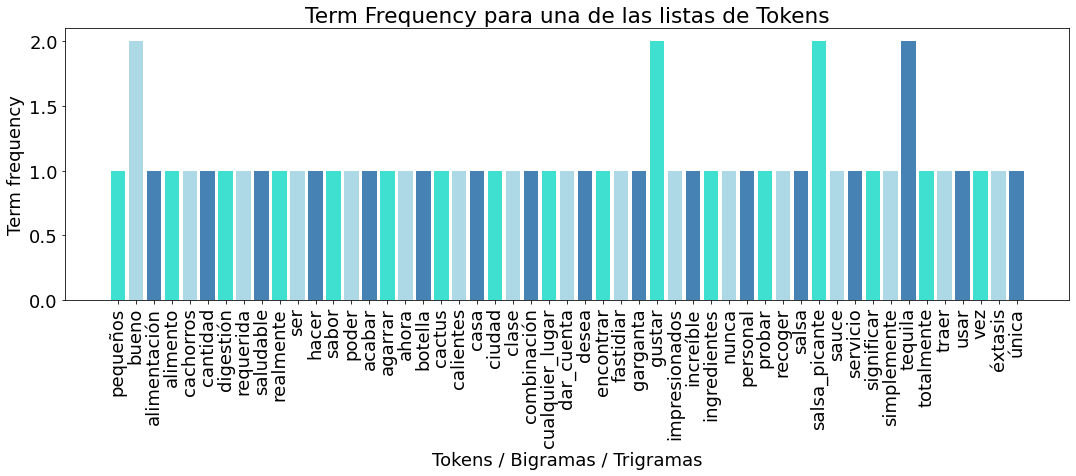

In [11]:
# Generamos un diccionario dónde se agregan los tokens / bigramas / trigramas 
# y su correspondiente tf (term-frequency) para poder imprimir una gráficas
# de barras y visualizar la información de manera más sencilla
Corpus_Tokens_Freq = dict()

for cp in corpus[9:11]:
    # Corpus nos regresa el Id y la Frecuencia de cada Token
    for id, freq in cp:
        if id2word[id] not in Corpus_Tokens_Freq: 
            Corpus_Tokens_Freq.setdefault(id2word[id], freq)
        else:
            Corpus_Tokens_Freq[id2word[id]] += freq


# Ploteamos la gráfica correspondiente al ejemplo anterior
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(18,5))
plt.title('Term Frequency para una de las listas de Tokens')
plt.bar(Corpus_Tokens_Freq.keys(), Corpus_Tokens_Freq.values(), color=['turquoise', 'lightblue', 'steelblue']) 
plt.xticks(rotation=90)
plt.xlabel("Tokens / Bigramas / Trigramas") 
plt.ylabel("Term frequency")

## Inciso F) Implementar algoritmo LDA 

In [12]:
# Construcción del modelo LDA
# Corpus       -> Conjunto de textos / documentos
# id2word      -> Diccionario con los Ids por Token
# num_topics   -> Cantidad de tópicos que se desean extraer
# random_state -> Semilla para reproducir los resultados
# update_every -> Tras cada iteración se actualizan todos los documentos
# chunksize    -> # de documentos que se analizan en cada iteracion
# alpha        -> Valor de Alfa que indica la prioridad correspondiente
#                 que tiene cada tópico, en auto, las prioridades se
#                 asignan de manera asimétrica y automática
# per_work_topics -> Extrae una lista del tópico más probable para
#                    cada token extraido
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Imprimimos las palabras más importantes que se 
# obtuvieron para cada tópico, así como su valor 
# de prioridad para dicho tópico
pprint(lda_model.print_topics())

[(0,
  '0.016*"sabor" + 0.013*"favorito" + 0.011*"hacer" + 0.011*"parecer" + '
  '0.010*"venir" + 0.009*"entonces" + 0.009*"gustar" + 0.009*"mal" + '
  '0.008*"encantar" + 0.008*"bien"'),
 (1,
  '0.025*"sabor" + 0.015*"poder" + 0.015*"hacer" + 0.013*"calorías" + '
  '0.013*"querer" + 0.010*"sólo" + 0.009*"bueno" + 0.009*"pedir" + '
  '0.009*"pensar" + 0.009*"decir"'),
 (2,
  '0.024*"esperar" + 0.012*"saludables" + 0.010*"sal_mar" + 0.008*"después" + '
  '0.007*"golosinas" + 0.007*"contar" + 0.007*"pasta" + 0.006*"té" + '
  '0.006*"preparar" + 0.006*"paquetes"'),
 (3,
  '0.018*"sabor" + 0.016*"poder" + 0.014*"sólo" + 0.014*"chips" + 0.012*"gran" '
  '+ 0.012*"comer" + 0.011*"ir" + 0.010*"tan" + 0.010*"comprar" + '
  '0.010*"bolsa"'),
 (4,
  '0.022*"poder" + 0.020*"hacer" + 0.018*"sabor" + 0.017*"gustar" + '
  '0.011*"mejor" + 0.011*"tiempo" + 0.010*"bien" + 0.010*"disfrutar" + '
  '0.010*"chips" + 0.010*"sabores"')]


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Cálculo de la coherencia del modelo, el cuál indica que tan buena es la división de los tópicos
# Mientras más alto es mejor. 
# model      -> modelo de LDA definido
# texts      -> textos del corpus con el que se clasificaron los modelos
# dictionary -> tokens únicos con los que se creó el modelo de LDA
# coherence  -> métdo para el cálculo de la coherencia
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_Filtrada, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nScore de Coherencia: ', coherence_lda)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Score de Coherencia:  0.37479858854306236


In [15]:
# Visualización de tópicos
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.132572  0.006530       1        1  33.980004
4      0.058488 -0.061817       2        1  21.206901
1      0.054514 -0.075589       3        1  20.441461
0     -0.030930  0.190307       4        1  16.129222
2     -0.214644 -0.059431       5        1   8.242413, topic_info=           Term        Freq       Total Category  logprob  loglift
239     esperar  115.000000  115.000000  Default  30.0000  30.0000
601      querer  159.000000  159.000000  Default  29.0000  29.0000
265    favorito  128.000000  128.000000  Default  28.0000  28.0000
86        bolsa  210.000000  210.000000  Default  27.0000  27.0000
980   disfrutar  125.000000  125.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
565    mantener   24.654064   77.978770   Topic5  -5.2872   1.3444
1058     perros   24.451678   79.106426   Topic5  -5.2954   1.3218
646     primera   20.828050   46.050743   Topic5  -5.4558   1.7024
1241   calorías   27.825722  279.492997   Topic5  -5.1662   0.1889
434       decir   25.593549  269.321922   Topic5  -5.2498   0.1423

[342 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
950       1  0.837114    abrir
950       3  0.074410    abrir
950       4  0.083711    abrir
3221      1  0.959854  abrirlo
3221      3  0.025942  abrirlo
...     ...       ...      ...
1508      5  0.956786    ácido
183       4  0.982494    única
344       1  0.964648    único
344       4  0.041049    único
1153      5  0.922449     útil

[596 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 1, 3])

## Inciso G) Análisis de coherencia en el modelo

In [16]:
# Generamos un método que evalúe la Coherencia de cada Modelo que se genere
# con una cantidad específica de Tópicos entre un valor inicial y uno final
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Utilizamos los mísmos métodos que en las celdas anteriores
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print('Cantidad de Tópicos: ' + str(num_topics) + ' | Coherencia: ' + str(coherencemodel.get_coherence()))

    return model_list, coherence_values

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Llamamos al método anterior con los parámetros que queramos evaluar (Límite, Inicio y Paso)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_Filtrada, 
                                                        limit=30, 
                                                        start=2, 
                                                        step=2)

C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cantidad de Tópicos: 2 | Coherencia: 0.4505771938233779
Cantidad de Tópicos: 4 | Coherencia: 0.4495956088099433
Cantidad de Tópicos: 6 | Coherencia: 0.43063939305368576
Cantidad de Tópicos: 8 | Coherencia: 0.4482516068076099
Cantidad de Tópicos: 10 | Coherencia: 0.4421350919749528
Cantidad de Tópicos: 12 | Coherencia: 0.44326825760724714
Cantidad de Tópicos: 14 | Coherencia: 0.4506389181299606
Cantidad de Tópicos: 16 | Coherencia: 0.44370947553786805
Cantidad de Tópicos: 18 | Coherencia: 0.4499280480390865
Cantidad de Tópicos: 20 | Coherencia: 0.4441640723543883
Cantidad de Tópicos: 22 | Coherencia: 0.4319294845605995
Cantidad de Tópicos: 24 | Coherencia: 0.4416779863435009
Cantidad de Tópicos: 26 | Coherencia: 0.442703277993808
Cantidad de Tópicos: 28 | Coherencia: 0.4350147496018657


C:\Users\mario\.conda\envs\actumlogos-cpu\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


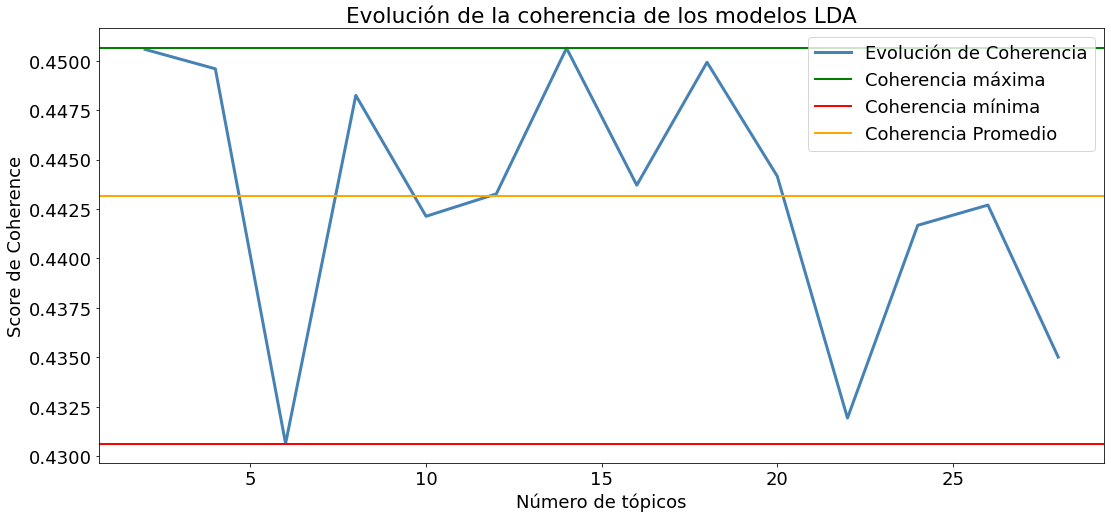

In [19]:
# Plotteamos la gráfica que muestra la evaluación
# de la coherencia según la cantidad de tópicos
limit=30 
start=2
step=2
# Obtenemos los valores de X para el eje horizontal
# de la gráfica
x = range(start, limit, step)
# Parámetros para el protteo de la gráfica
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(18,8))
plt.title('Evolución de la coherencia de los modelos LDA')
plt.plot(x, coherence_values, color = 'steelblue', lw=3)
plt.xlabel("Número de tópicos")
plt.ylabel("Score de Coherence")
# Líneas horizontales para señalar valor mínimo, máximo y promedio
plt.axhline(max(coherence_values), lw =2, c='g')
plt.axhline(min(coherence_values), lw =2, c='r')
plt.axhline(sum(coherence_values)/len(coherence_values), lw =2, c='orange')
plt.legend(['Evolución de Coherencia', 'Coherencia máxima', 'Coherencia mínima', 'Coherencia Promedio'])